In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit 
import glob
import os

import matplotlib.ticker as ticker

plt.style.use(['ggplot', 'science'])

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200
glob.glob('logging/*')


['logging/double_peak_zoomed_3',
 'logging/pre_second_adjust_pd',
 'logging/double_peak_zoomed_2',
 'logging/post_compression_adjust',
 'logging/spitfire_analysis.ipynb',
 'logging/spitfire_osc_first',
 'logging/double_pulse_or_not',
 'logging/double_peak_zoomed',
 'logging/HVAC_morning_smaller_beam',
 'logging/HVAC_morning_thurs',
 'logging/converted_1_30pm',
 'logging/1_39',
 'logging/moku_go_data_analysis.ipynb',
 'logging/post_oscillator_adjust',
 'logging/spitfire_analysis_max_V.ipynb',
 'logging/feb_14',
 'logging/post_adjust_pd',
 'logging/spitfire_osc_wide_window']

In [2]:
def model(x, a, x0, s, C):
    return a/np.sqrt(2*np.pi)/s*np.exp(-1/2*(x-x0)**2/s**2) + C

In [3]:
# uncalibrated filesW

pos_mm = np.array([float(".".join(os.path.basename(f).split('.')[:2])) for f in files])
e_pos = 100e-6
V = np.array([np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',').mean(axis = 0)[-1] for f in files])

e_V = np.array([np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',').std(axis = 0)[-1] for f in files])

zipped = zip(pos_mm, V, e_V)
pos_mm, V, e_V = zip(*sorted(zipped))
pos_mm = np.array(pos_mm)
V = np.array(V)
e_V = np.array(e_V)

<ErrorbarContainer object of 3 artists>

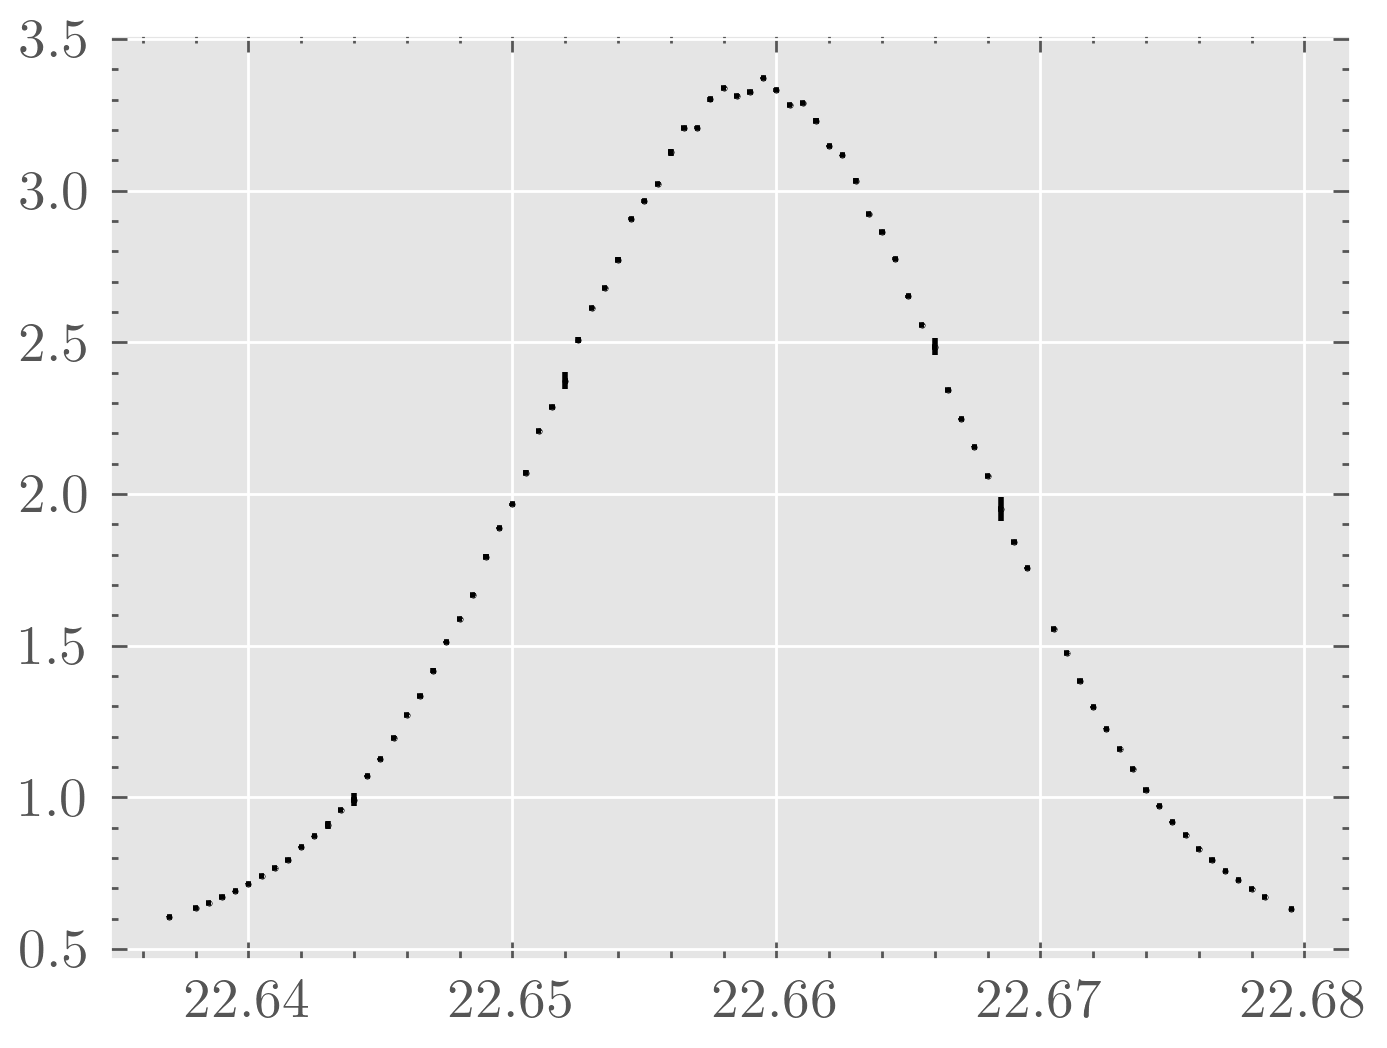

In [4]:
plt.errorbar(pos_mm, V, xerr = e_pos, yerr= e_V ,fmt = 'ko', ms = .1)
# xx = np.linspace(np.min(pos_mm), np.max(pos_mm), 200)
# plt.plot(xx, model(xx, .05, 22.659,.008, .5))

**We measured in delay distance. The time delay is distance change times two. But the signal is twice as wide, in time domain, as the original signal by symmetry!!**

In [5]:
fit, err = curve_fit(model, pos_mm, V, sigma = e_V, absolute_sigma= True,  p0 = [.05, 22.659,.008, .5])


In [6]:
width = fit[-2]/1e3/3e8 /1e-15 * 2
e_width = np.sqrt(np.diag(err))[-2]/1e3/3e8 /1e-15
print(f'{width:.3f} +/- {e_width:.3f}')

52.983 +/- 0.011


In [7]:
t_fs = (pos_mm - fit[-3])/1e3/2.998e8/1e-15*2
e_t_fs = np.sqrt((e_pos/1e3/2.998e8/1e-15*2)**2 + (np.sqrt(np.diag(err))[-3]/1e3/2.998e8/1e-15*2)**2)

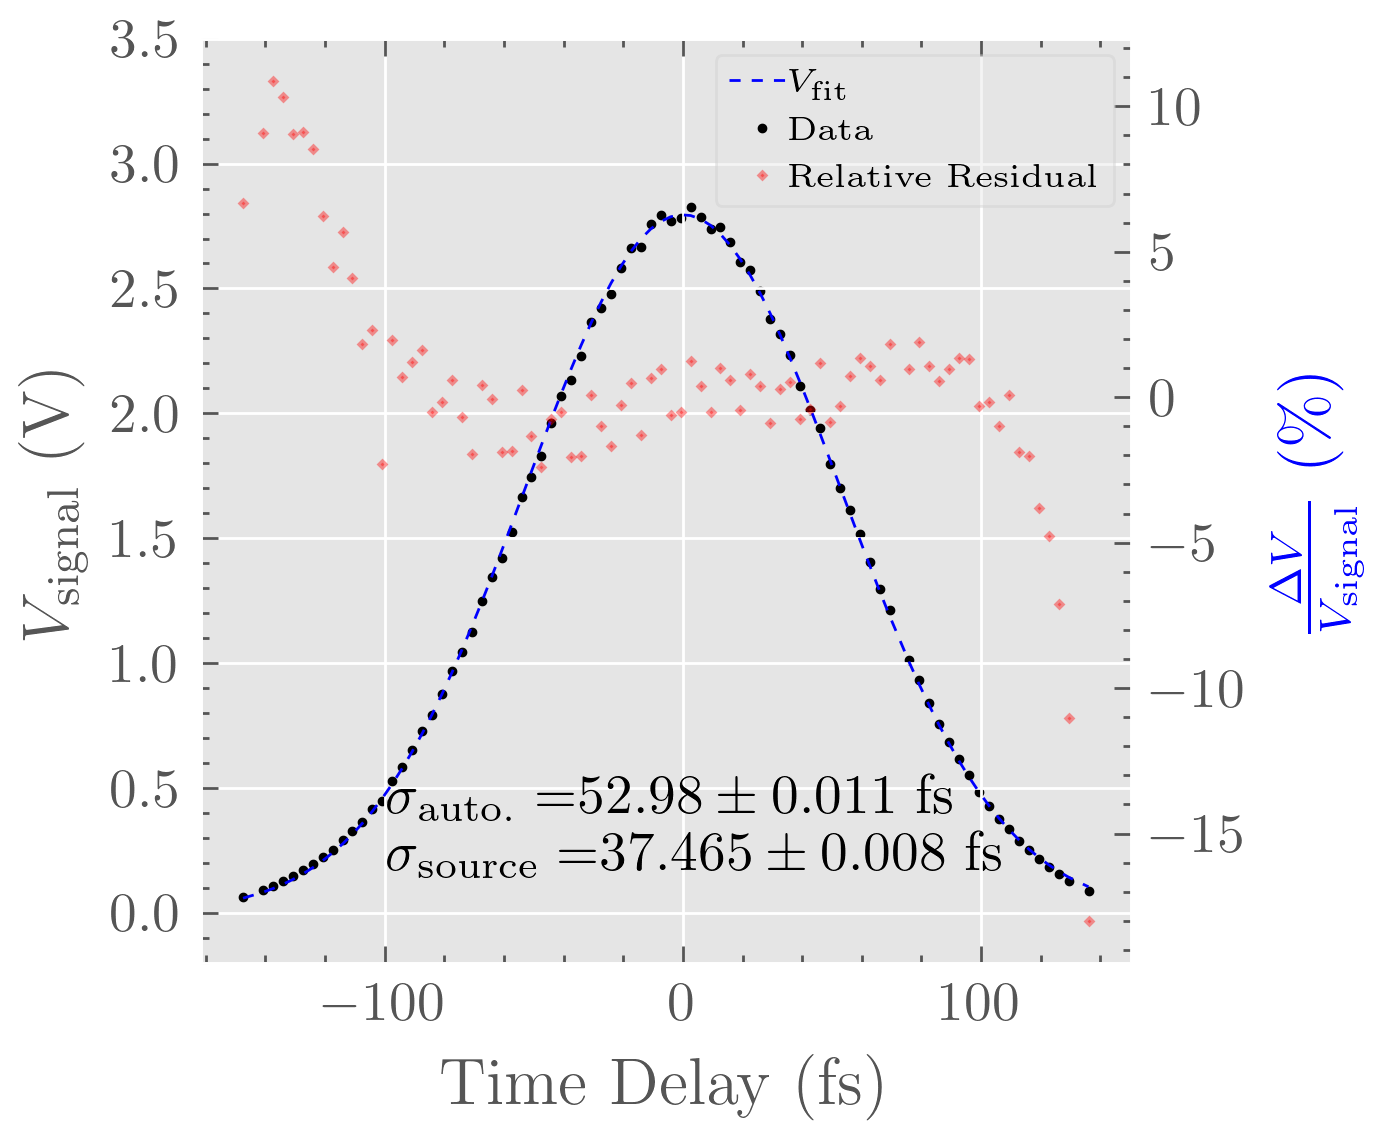

In [13]:
signal = model(pos_mm, *fit[:-1], 0)

fig = plt.figure(figsize = (3,3))

ax1 = plt.gca()

line_1 = ax1.plot(t_fs, signal, 'b-', lw = .5, dashes = (4,4), zorder = 1, label ='$V_{\mathrm{fit}}$ ')

line_2 = ax1.plot(t_fs, V-fit[-1], 'k.', ms = 1.5, zorder = 0, label ='Data')


ax1.set_ylabel('$V_{\mathrm{signal}}$ (V)')
ax1.set_ylim(-.2,3.5)

ax2 = ax1.twinx()
line_3 = ax2.plot(t_fs, (V - model(pos_mm, *fit)) / (V- fit[-1]) *100,'rD', label = 'Relative Residual',
                 zorder = -2, ms = .5, alpha = .4)

ax2.set_ylabel(r'$\frac{\Delta V}{V_{\mathrm{signal}}}$ (\%)', color = 'b')
# ax2.set_yscale('log')


lines = [line_1[0],line_2[0],line_3[0]]
labs = [l.get_label() for l in lines]

fwhm_factor = 2.355

ax1.set_xlabel('Time Delay (fs)')
text_out = "$\sigma_{\mathrm{auto.}}=$" + f"${width:.2f}\pm{e_width:.3f}$ fs\n"+\
"$\sigma_{\mathrm{source}}=$" + f"${width/np.sqrt(2) :.3f}\pm{e_width/np.sqrt(2) :.3f}$ fs\n"

ax1.text(.2,.04, s = text_out, transform = ax1.transAxes,zorder= 2)
ax2.grid(False)
# ax1.grid(False)
leg = plt.legend(lines, labs, loc= 1, framealpha = .4, shadow =False, frameon = 1,
                 handletextpad=-.2, prop={'size': 6} )
frame = leg.get_frame()
# frame.set_color('white')
plt.savefig('figures/menlo_signal.pdf', bbox_inches = 'tight', format = 'pdf')


We see this asymmetry due to imperfect alignment. But this is good enough?

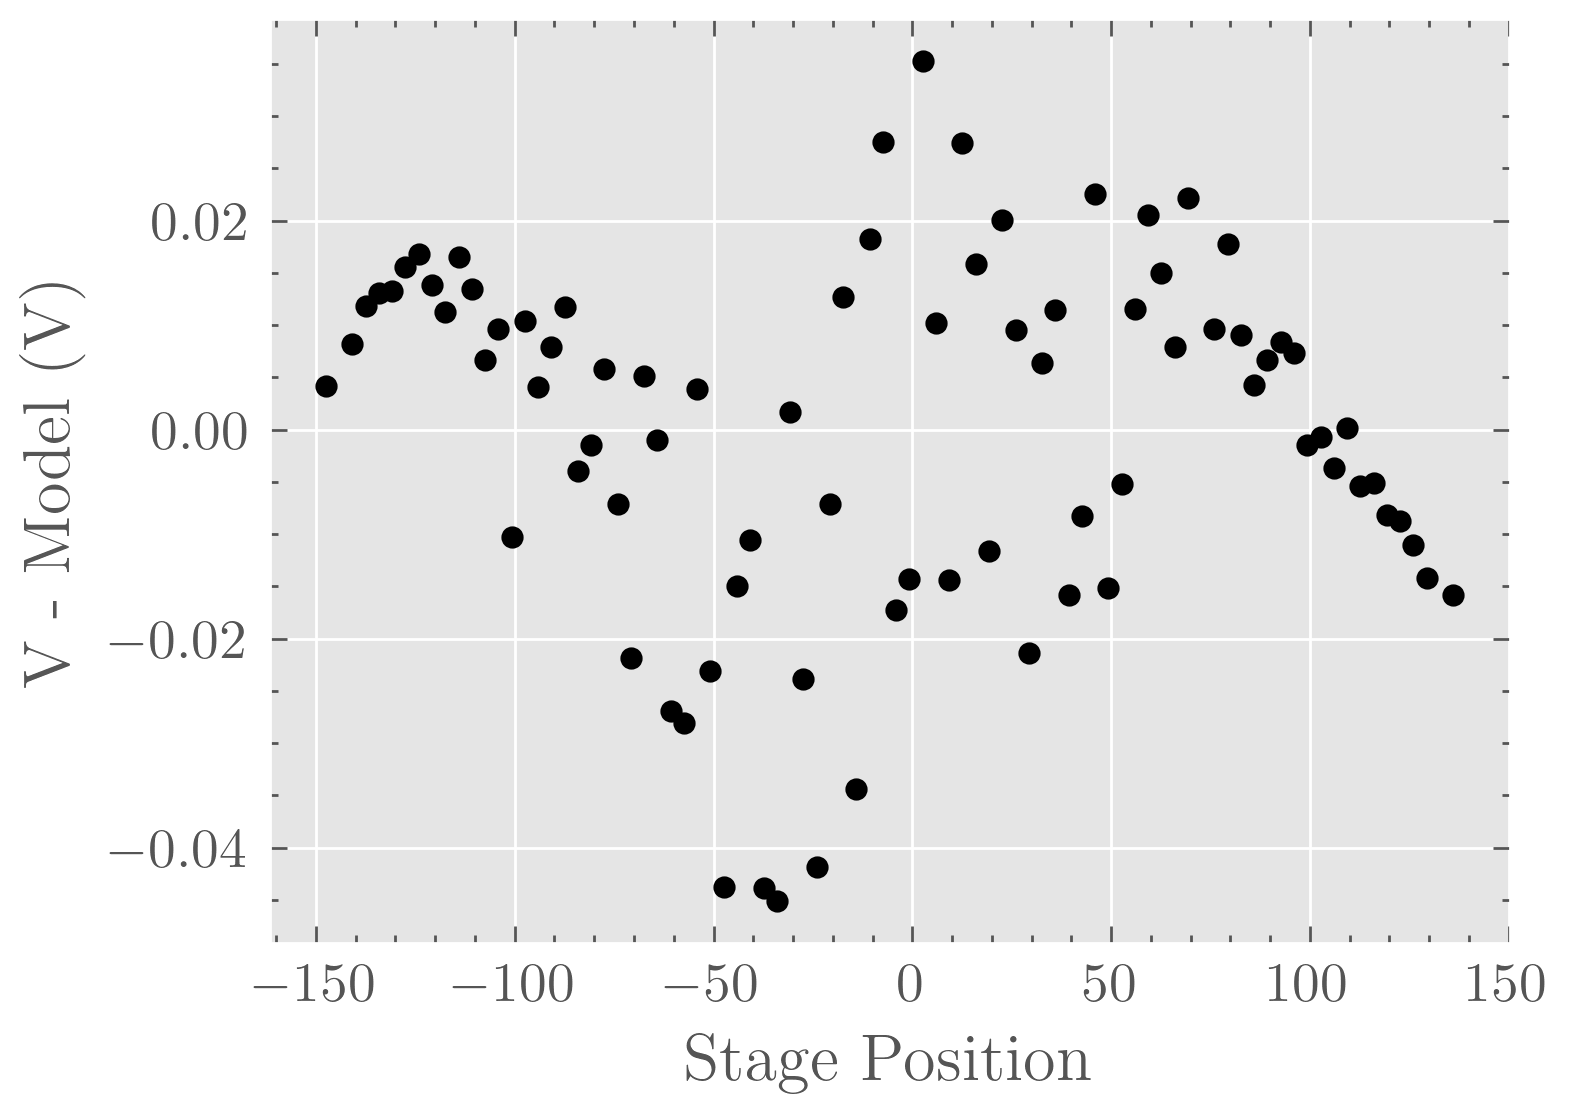

In [10]:
# plt.plot(xx, model(xx, *fit))
# plt.plot(pos_mm, V,'ko', ms = 1.5)
plt.plot(t_fs, V - model(pos_mm, *fit), 'k.')
plt.ylabel('V - Model (V)')
plt.xlabel('Stage Position')
plt.savefig("figures/feb_13_1_39_Res.pdf", dpi =300, bbox_inches = 'tight')

In [10]:
V[np.argmin(np.abs(pos_mm-22.652))]

2.3734061255012224

In [ ]:
pos_mm[np.argmin(np.abs(pos_mm-22.652))]

In [ ]:
idx_err = [i for i, f in sorted(zip(np.arange(len(files)), e_V), key=lambda pair: pair[1], reverse = True)]

In [ ]:
plt.plot(np.genfromtxt(files[idx_err[-2]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1])

In [11]:
plt.plot(np.genfromtxt(files[idx_err[2]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1])

NameError: name 'idx_err' is not defined

In [12]:
plt.plot(np.sum(np.abs([np.fft.rfft(np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1]) for f in files]), axis = 0))
plt.yscale('log')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (83,) + inhomogeneous part.

In [ ]:

mask = np.cos(np.linspace(-np.pi/2,np.pi/2, 1000))

In [ ]:
fft = np.fft.rfft(np.genfromtxt(files[idx_err[10]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1][:1000]*mask)


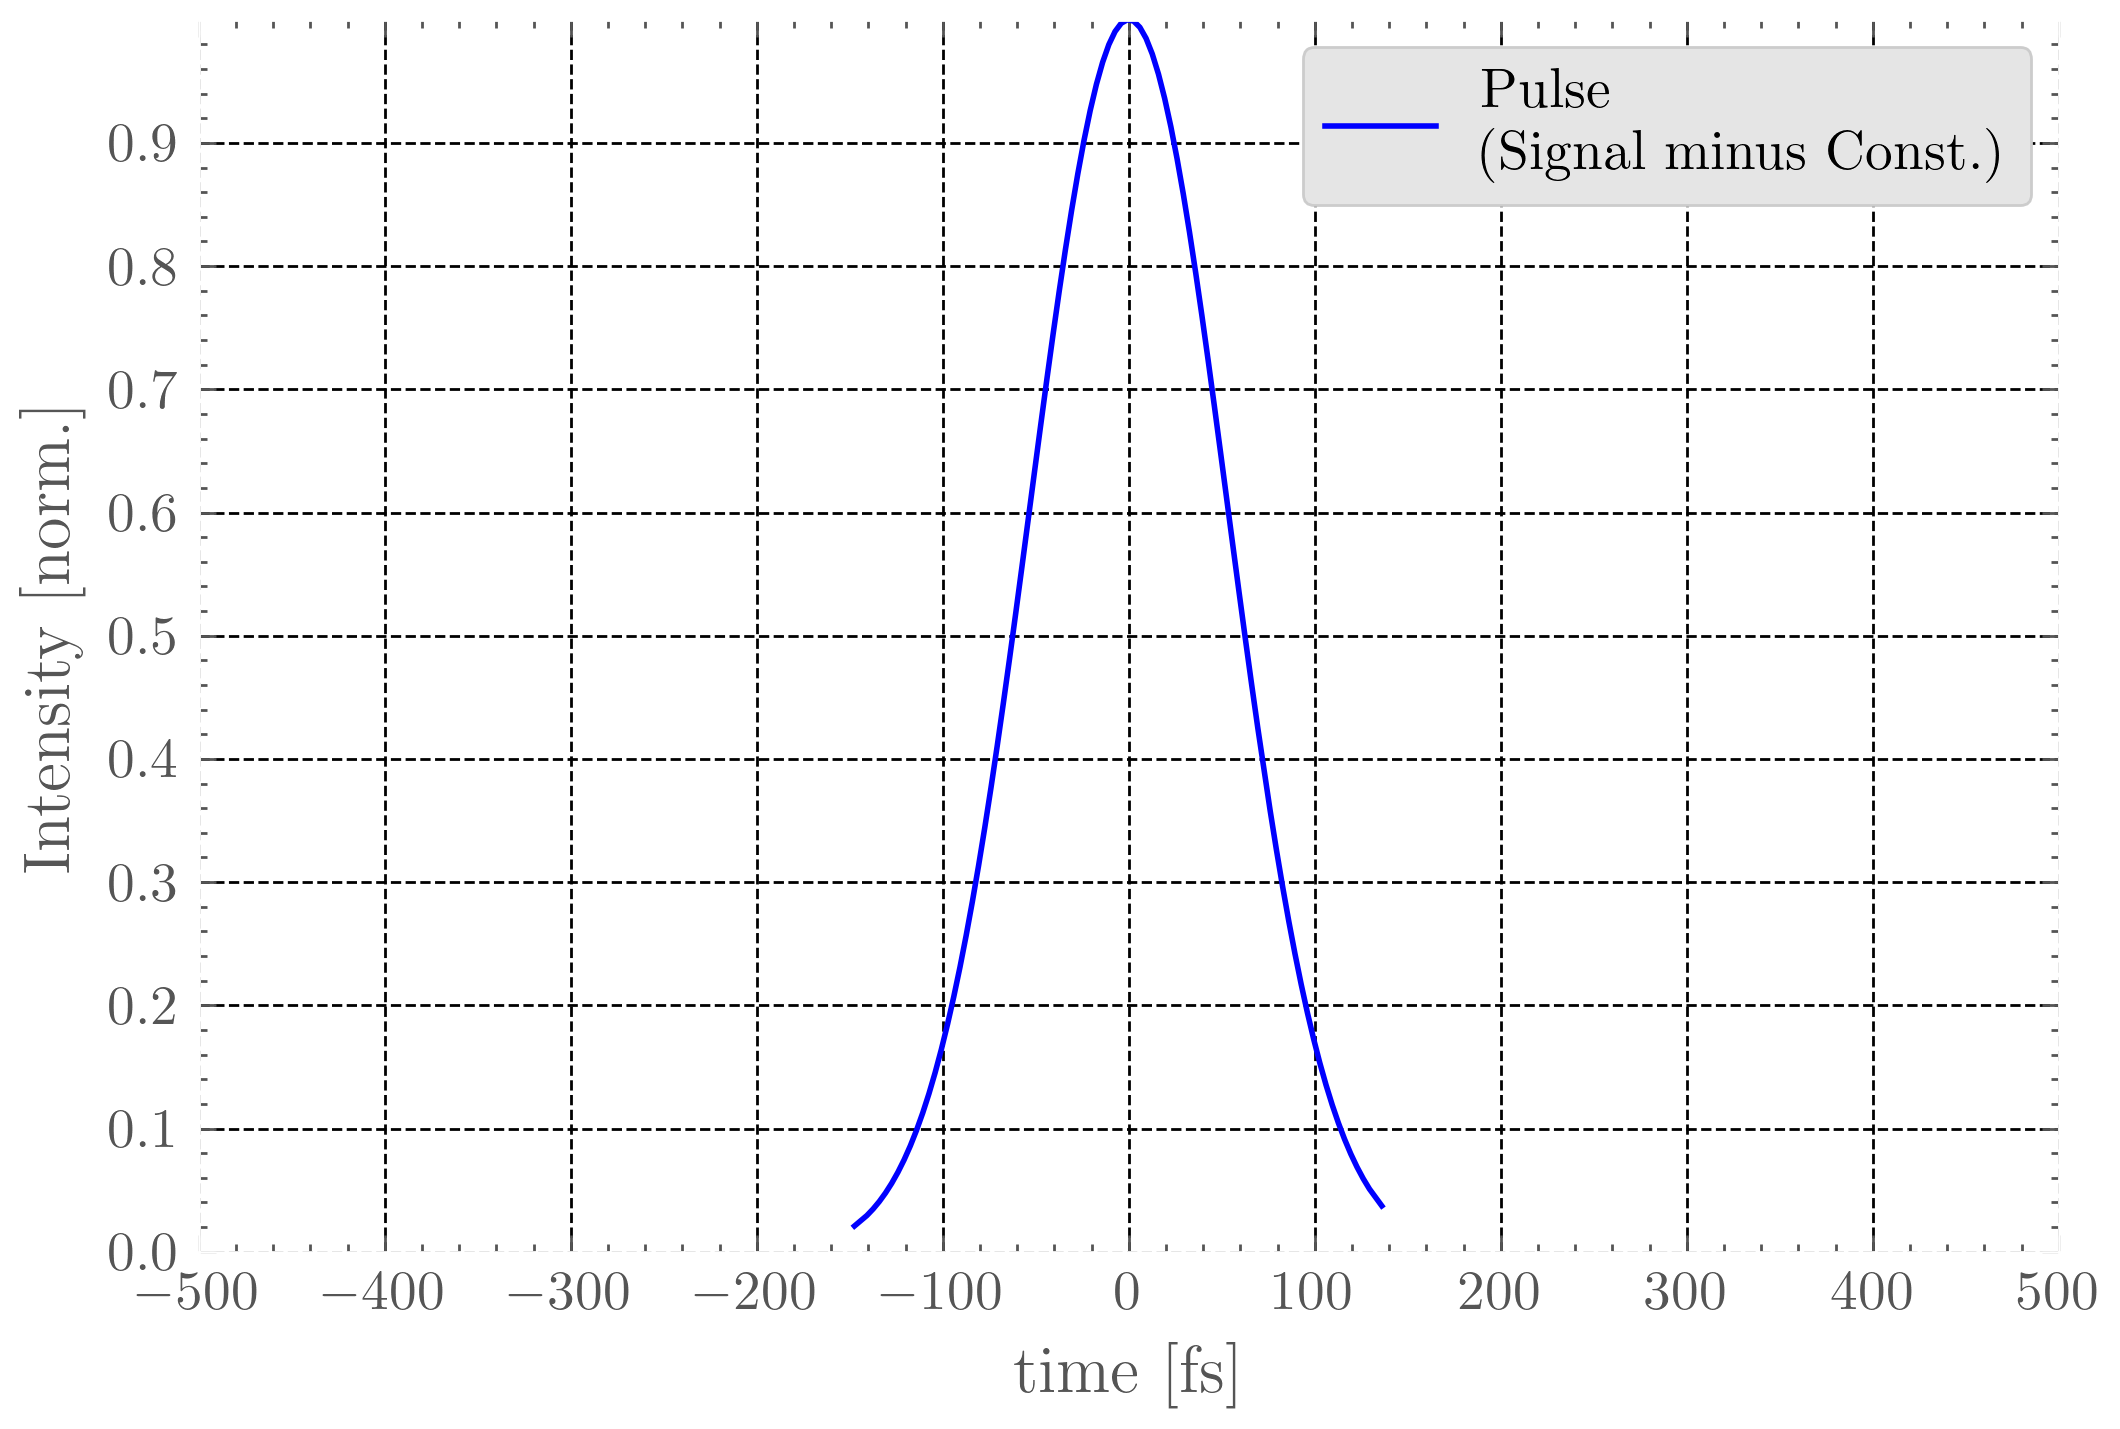

In [19]:
fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot()
ax.set_facecolor('xkcd:white')

ax.plot(t_fs, signal/np.max(signal), 'b-', ms = 2, label = 'Pulse\n(Signal minus Const.)')
ax.set_xlim(-500,500)
ax.set_ylim(0,1)
ax.grid(ls = '--',c='k')
ax.set_ylabel('Intensity [norm.]')
ax.set_xlabel('time [fs]')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(-500,600,100)))
ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(0,1,0.1)))
ax.legend(loc= 1, framealpha = 1, shadow =False, frameon = 1, fontsize = 'medium')

fig.savefig('figures/menlo_trace.pdf', format= 'pdf', bbox_inches = 'tight')

# Plotting the Data Logger

In [208]:
files

['logging/1_39/22_637_19700128_073247.csv',
 'logging/1_39/22_6385_19700128_073255.csv',
 'logging/1_39/22_638_19700128_073252.csv',
 'logging/1_39/22_6395_19700128_073301.csv',
 'logging/1_39/22_639_19700128_073258.csv',
 'logging/1_39/22_6405_19700128_073306.csv',
 'logging/1_39/22_6415_19700128_073312.csv',
 'logging/1_39/22_641_19700128_073309.csv',
 'logging/1_39/22_6425_19700128_073317.csv',
 'logging/1_39/22_642_19700128_073315.csv',
 'logging/1_39/22_6435_19700128_073323.csv',
 'logging/1_39/22_643_19700128_073320.csv',
 'logging/1_39/22_6445_19700128_073329.csv',
 'logging/1_39/22_644_19700128_073326.csv',
 'logging/1_39/22_6455_19700128_073334.csv',
 'logging/1_39/22_645_19700128_073331.csv',
 'logging/1_39/22_6465_19700128_073340.csv',
 'logging/1_39/22_646_19700128_073337.csv',
 'logging/1_39/22_6475_19700128_073345.csv',
 'logging/1_39/22_647_19700128_073343.csv',
 'logging/1_39/22_6485_19700128_073351.csv',
 'logging/1_39/22_648_19700128_073348.csv',
 'logging/1_39/22_649

In [217]:
import random
from scipy.stats import norm

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use(['ggplot','science'])



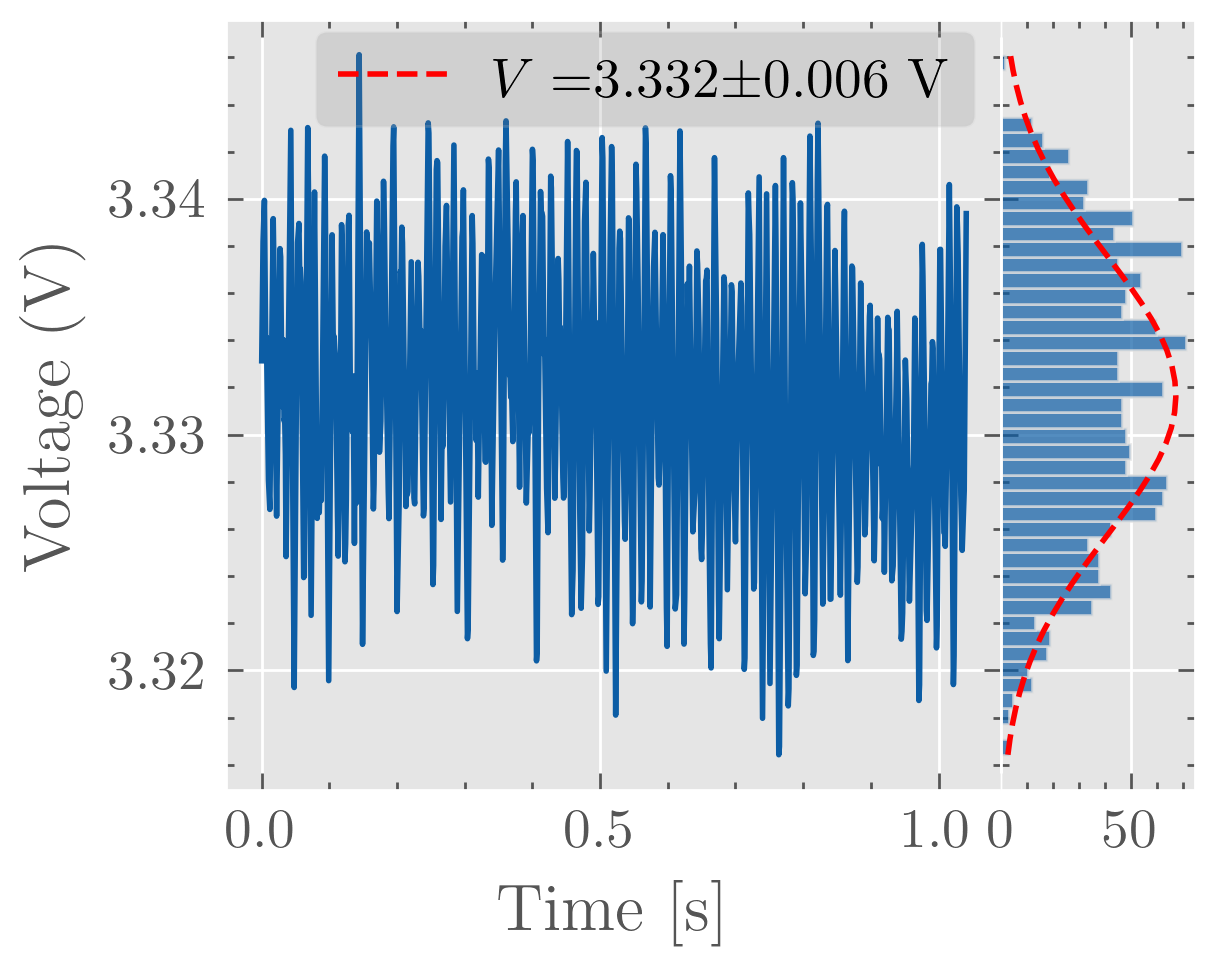

In [263]:
f = 'logging/1_39/22_66_19700128_073455.csv'
t, c1, c2 = np.genfromtxt(f, skip_header= 8, dtype = float, 
                            delimiter = ',').T
# plt.scatter(t, c2, alpha = .7, s = 3, edgecolor= 'k')
plt.figure(figsize = (2.5,2.5))
plt.plot(t, c2)
plt.ylabel('Voltage (V)')
plt.xlabel('Time [s]')
ax = plt.gca()
# axspec = ax.inset_axes([0, 1, 1.25, 0.4])
# axspec.xaxis.set_visible(False)
# axspec.yaxis.set_visible(False)
# wind = np.cos(np.linspace(-np.pi/2, np.pi/2, len(c2)))
# freqs = np.fft.rfftfreq(len(c2), d = np.median(np.diff(c2)))
# axspec.loglog(freqs, np.abs((np.fft.rfft((c2 * wind)))**2),'-')

ax_histy = ax.inset_axes([1.0, 0, 0.25, 1], sharey=ax)
plt.setp(ax_histy.get_yticklabels(),visible = False)
n, edges, _ = ax_histy.hist(c2, orientation="horizontal", bins=45, edgecolor='#e0e0e0',
                            linewidth=0.5, alpha=0.7, density = True)
mu, sigma = norm.fit(c2)
ax_histy.plot(norm.pdf(edges, mu, sigma), edges, c='r', ls = '--', 
              label = f'$V=${np.mean(c2):.3f}$\pm{np.std(c2):.3f}$ V')
ax_histy.legend(loc= 'upper right', bbox_to_anchor = (1,1.02), bbox_transform= ax.transAxes,frameon = True,
               facecolor = 'gray', framealpha = .2)

plt.savefig('figures/Menlo_good_data.pdf', format= 'pdf', bbox_inches = 'tight')

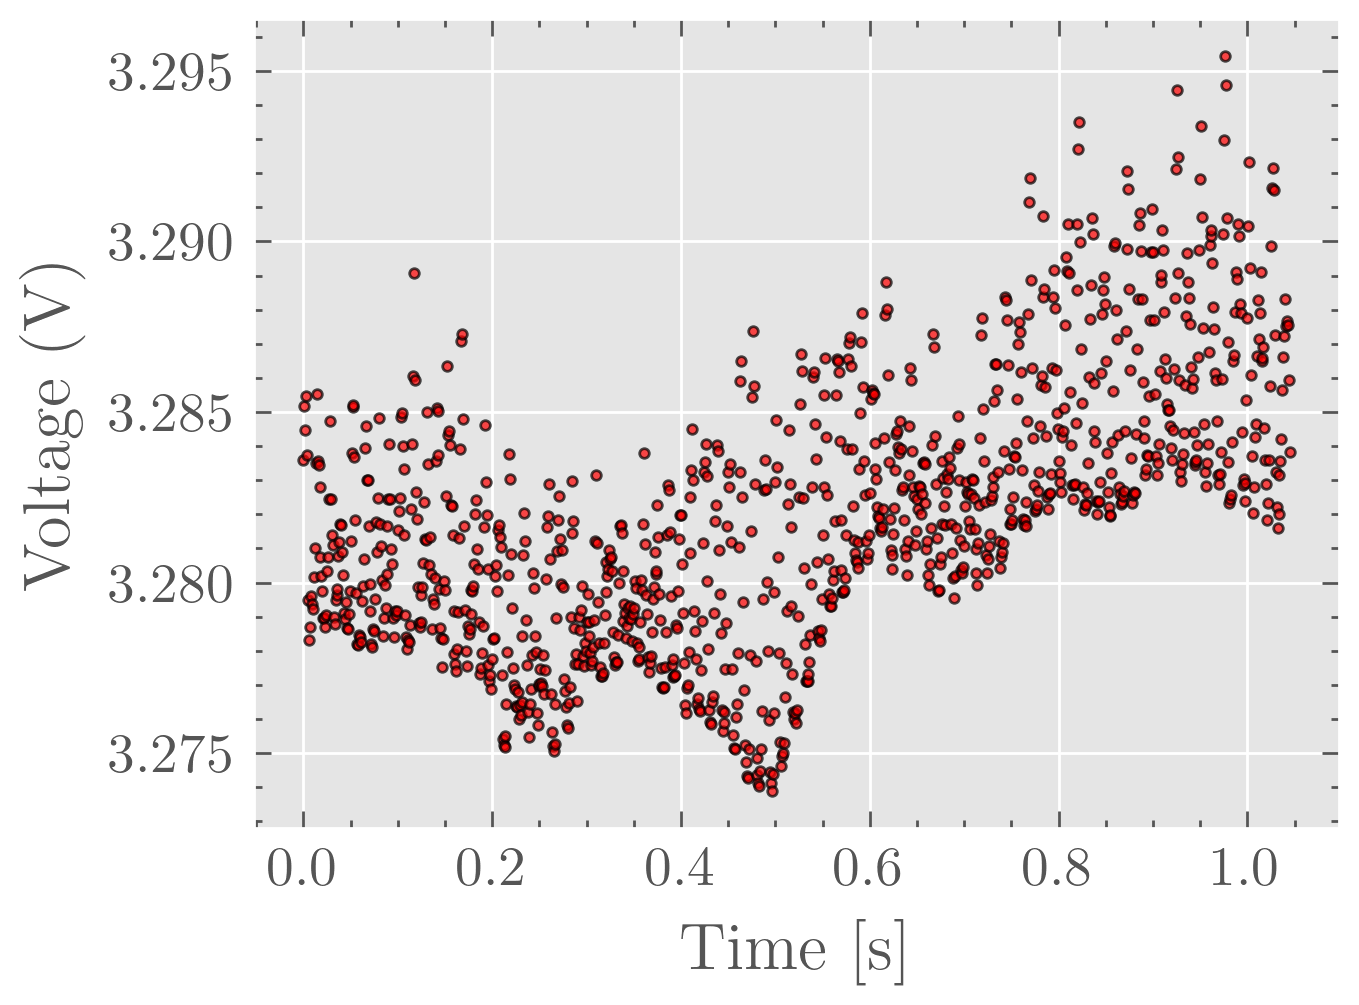

In [137]:
f =  'logging/1_39/22_6605_19700128_073458.csv'
t, c1, c2 = np.genfromtxt(f, skip_header= 8, dtype = float, 
                            delimiter = ',').T
plt.scatter(t, c2, alpha = .7, s = 3, c= 'r', edgecolor= 'k')
plt.ylabel('Voltage (V)')
plt.xlabel('Time [s]')
# plt.title("Fluctuating Readout")

plt.savefig('figures/Menlo_bad_data.pdf', format= 'pdf', bbox_inches = 'tight')

In [128]:

f2plot = random.sample(files, 20)

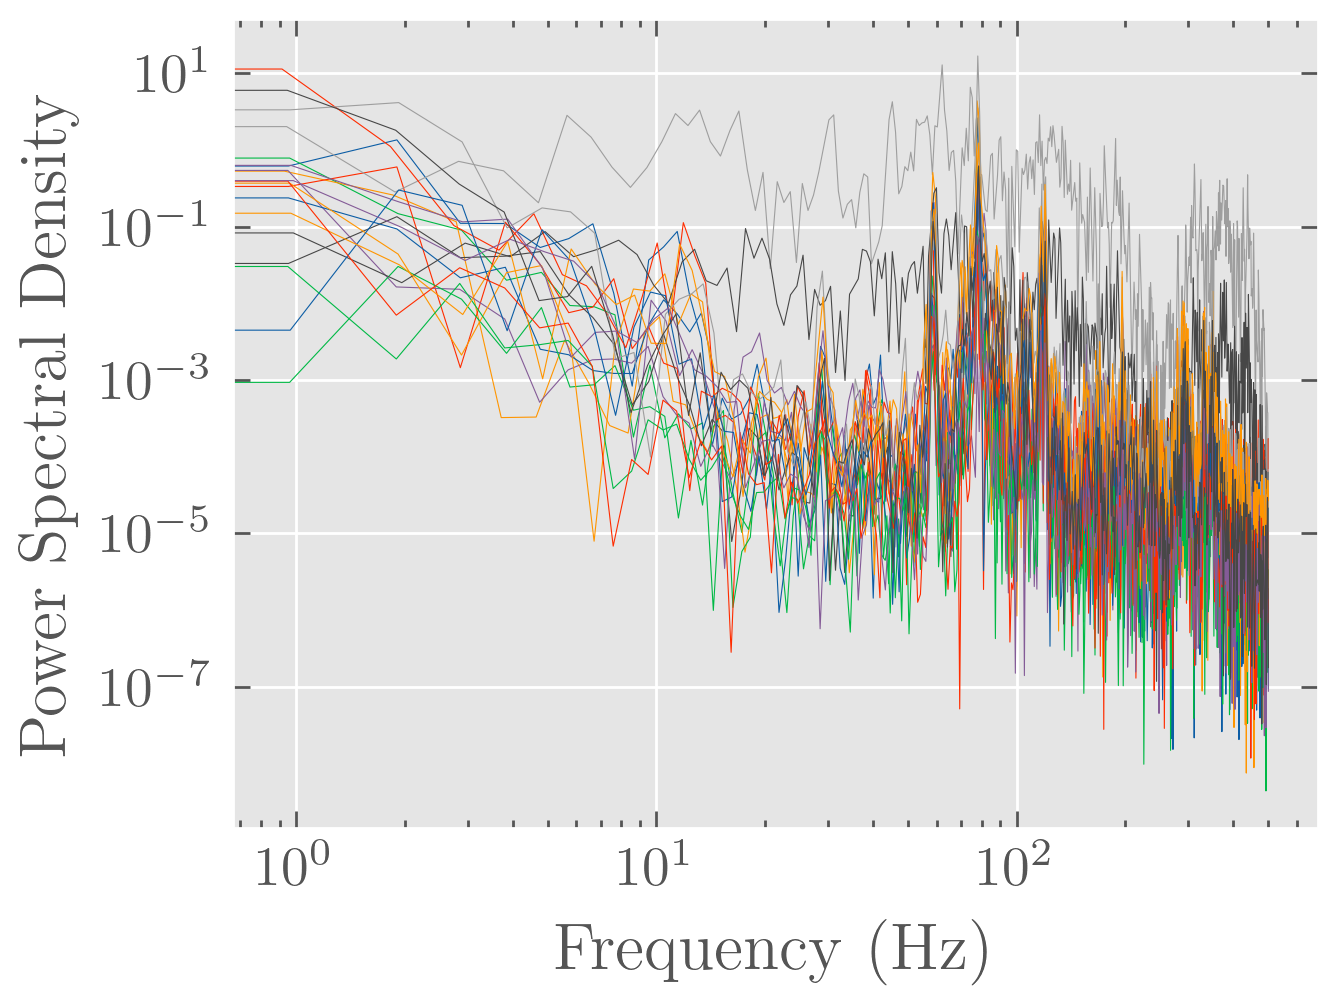

In [258]:
def plot_file(f):
    t, c1, c2 = np.genfromtxt(f, skip_header= 8, dtype = float, 
                            delimiter = ',').T
    
    xx = np.linspace(-np.pi/2, np.pi/2, len(c2))
    wind = np.cos(xx)
    freqs = np.fft.rfftfreq(n = len(c2), d  =np.median(np.diff(t)))
    
    plt.loglog(freqs, np.abs((np.fft.rfft(((c2-np.mean(c2)) * wind)))**2), lw = .2)
    


fig = plt.figure()
ax = plt.gca()

plt.xlabel('Frequency (Hz)')
plt.ylabel("Power Spectral Density")
for f in f2plot:
    plot_file(f)

plt.savefig("figures/PSD.pdf", format = 'pdf', bbox_inches = 'tight')

In [259]:
ax.set_xlim(30,150)
ax.axvline(59,c= 'k',ls = '--', label = '59 Hz', lw = .8)
ax.axvline(78,c='b', ls = '--', label = '78 Hz',lw = .8)
ax.axvline(120,c='r', ls = '--', label ='120 Hz',lw = .3)
ax.axvline(118, c= 'purple', ls = '--', label ='118 Hz',lw = .3)
ax.legend()
fig.savefig("figures/PSD_zoomed.pdf", format= 'pdf', bbox_inches = 'tight')

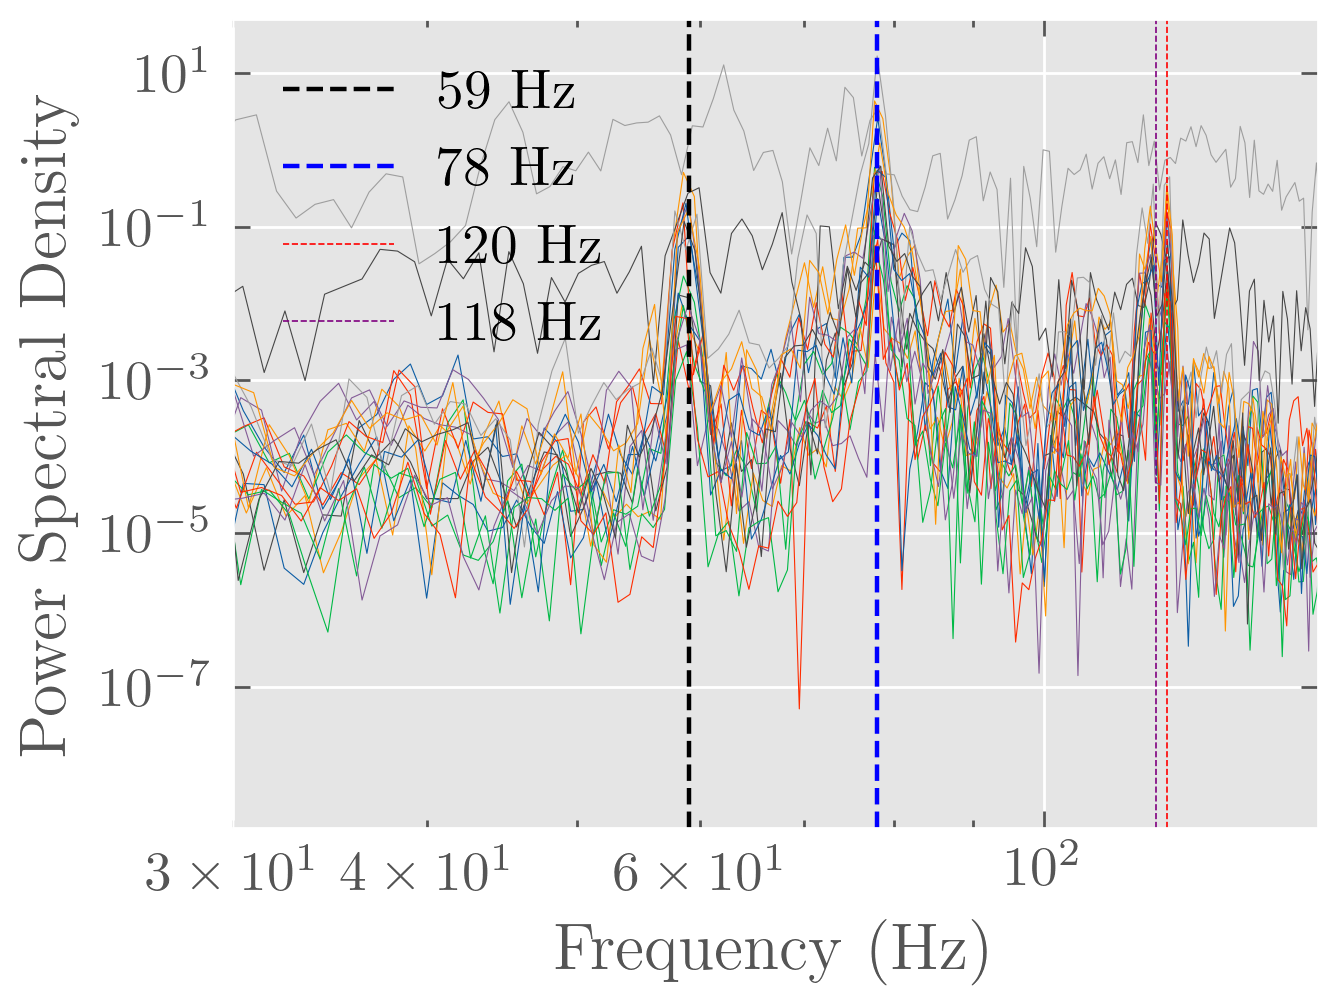

In [260]:
fig

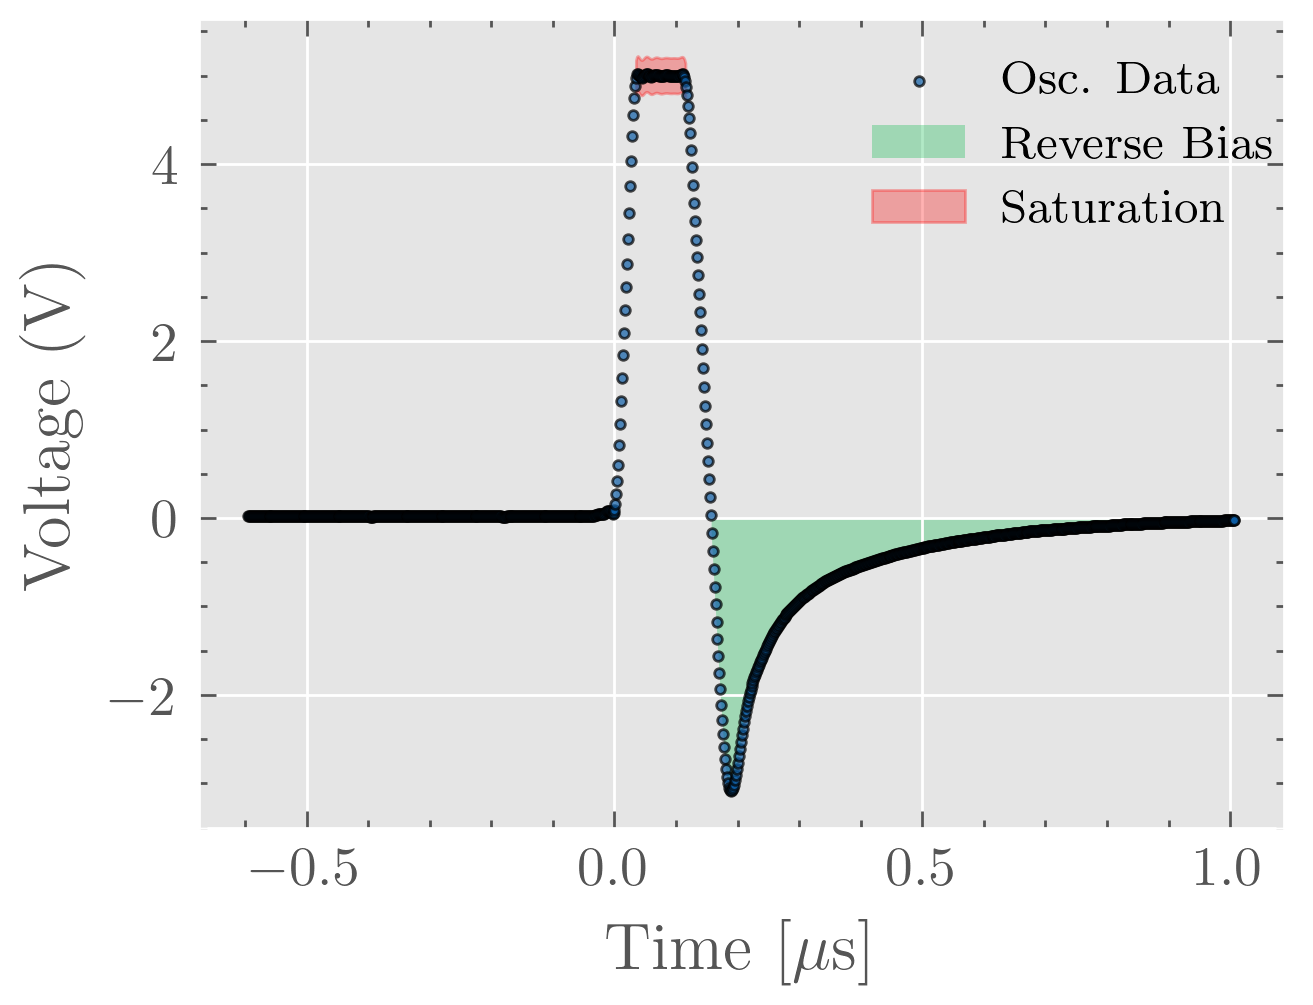

In [265]:
f ='logging/double_peak_zoomed/11_652/0.csv'

t, V = np.genfromtxt(f, skip_header= 8, dtype = float, 
                            delimiter = ',').T
t = t*1e6
fill_cond = V<0
sat = np.abs(V-V.max()) < .1
plt.scatter(t, V, alpha = .7, s = 3, edgecolor= 'k', label = 'Osc. Data')
plt.fill_between(t[fill_cond], V[fill_cond], 0, zorder = -2, alpha = .3, label ='Reverse Bias')
plt.fill_between(t[sat], V[sat]+.2, V[sat] - .2,color='r', zorder = -2, alpha = .3, label ='Saturation')
plt.ylabel('Voltage (V)')
plt.xlabel('Time [$\mu$s]')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.03, 1.0), fontsize = 'small')
plt.savefig('figures/spitfire_osc_data.pdf', format = 'pdf', bbox_inches = 'tight')